In [1]:
#Importing Libraries
import srsly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
import nltk
import ssl
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
# Bypass SSL certificate verification
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sowrabharavishankar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sowrabharavishankar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sowrabharavishankar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
#Read the data
data = (srsly.read_gzip_jsonl("All_Beauty_5.json.gz"))
df = pd.DataFrame(data)
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 1, 2016",A3CIUOJXQ5VDQ2,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Shelly F,As advertised. Reasonably priced,Five Stars,1472688000,NaN,NaN
1,5.0,True,"11 14, 2013",A3H7T87S984REU,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",houserules18,Like the oder and the feel when I put it on my...,Good for the face,1384387200,NaN,NaN
2,1.0,True,"08 18, 2013",A3J034YH7UG4KT,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Adam,I bought this to smell nice after I shave. Wh...,Smells awful,1376784000,NaN,NaN
3,5.0,False,"05 3, 2011",A2UEO5XR3598GI,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,Truth is There IS Nothing Like an AQUA VELVA MAN.,1304380800,25,NaN
4,5.0,True,"05 6, 2011",A3SFRT223XXWF7,B00006L9LC,{'Size:': ' 200ml/6.7oz'},C. C. Christian,If you ever want to feel pampered by a shampoo...,Bvlgari Shampoo,1304640000,3,NaN


In [4]:
#Clean/drop some columns that are not required
def clean_columns(df):
    df = df.drop(['style', 'vote', 'image'], axis = 1)
    df.isnull().sum()
    df.dropna(inplace=True)
    return df
df = clean_columns(df)

In [5]:
#Count of words in Review Text
df['reviewtext_count'] = df['reviewText'].apply(lambda x: len(x.split()))

# **Text Preprocessing**

In [6]:
stop_words = set(stopwords.words('english'))

def preprocessing_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['CleanedText'] = df['reviewText'].apply(preprocessing_text)

In [7]:
#Based on CleanedText
df['SentimentScore'] = df['CleanedText'].apply(lambda x: TextBlob(x).sentiment.polarity)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,reviewtext_count,CleanedText,SentimentScore
0,5.0,True,"09 1, 2016",A3CIUOJXQ5VDQ2,B0000530HU,Shelly F,As advertised. Reasonably priced,Five Stars,1472688000,4,advertised reasonably priced,0.200000
1,5.0,True,"11 14, 2013",A3H7T87S984REU,B0000530HU,houserules18,Like the oder and the feel when I put it on my...,Good for the face,1384387200,44,like oder feel put face tried brands reviews p...,-0.141667
2,1.0,True,"08 18, 2013",A3J034YH7UG4KT,B0000530HU,Adam,I bought this to smell nice after I shave. Wh...,Smells awful,1376784000,30,bought smell nice shave put smelled awful 19 s...,-0.066667
3,5.0,False,"05 3, 2011",A2UEO5XR3598GI,B0000530HU,Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,Truth is There IS Nothing Like an AQUA VELVA MAN.,1304380800,266,hey aqua velva man absolutely love stuff using...,0.244322
4,5.0,True,"05 6, 2011",A3SFRT223XXWF7,B00006L9LC,C. C. Christian,If you ever want to feel pampered by a shampoo...,Bvlgari Shampoo,1304640000,45,ever want feel pampered shampoo one one smells...,0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...
5264,5.0,True,"08 23, 2018",AUX122XW8ONG6,B01DLR9IDI,Amzon Customer,I have genetic undereye darkness. Ive accepted...,Pretty Sweet!!!,1534982400,48,genetic undereye darkness ive accepted long ti...,0.250000
5265,5.0,True,"08 23, 2018",AUX122XW8ONG6,B01DLR9IDI,Amzon Customer,I absolutely love this eye gel.,As advertised,1534982400,6,absolutely love eye gel,0.500000
5266,5.0,True,"08 23, 2018",AUX122XW8ONG6,B01DLR9IDI,Amzon Customer,The eye gel is easy to apply and I use it morn...,I'm very happy with,1534982400,25,eye gel easy apply use morning night cool touc...,0.427778
5267,5.0,True,"08 23, 2018",AUX122XW8ONG6,B01DLR9IDI,Amzon Customer,Ok this eye gel is good stuff.,Does it's thing!,1534982400,7,ok eye gel good stuff,0.600000


## **Data Visualization**

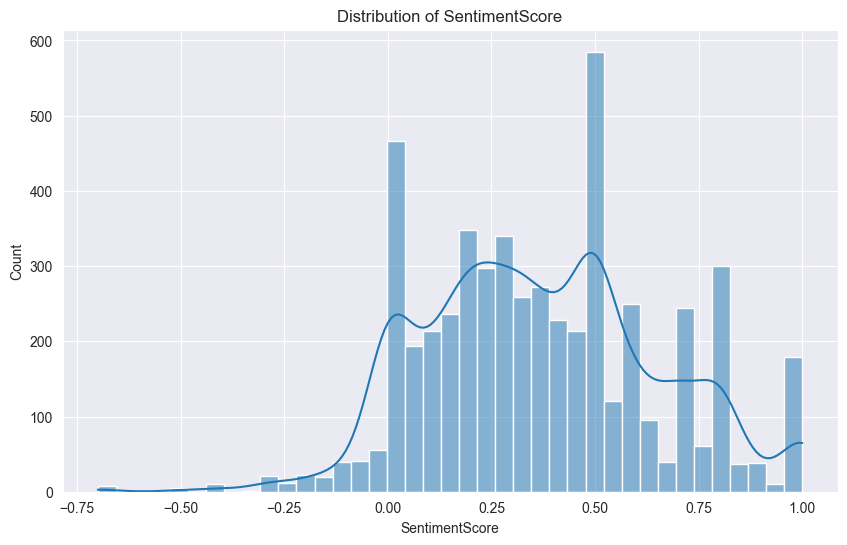

In [8]:
# Distribution of SentimentScore
plt.figure(figsize=(10, 6))
sns.histplot(df['SentimentScore'], kde=True)
plt.title('Distribution of SentimentScore')
plt.show()

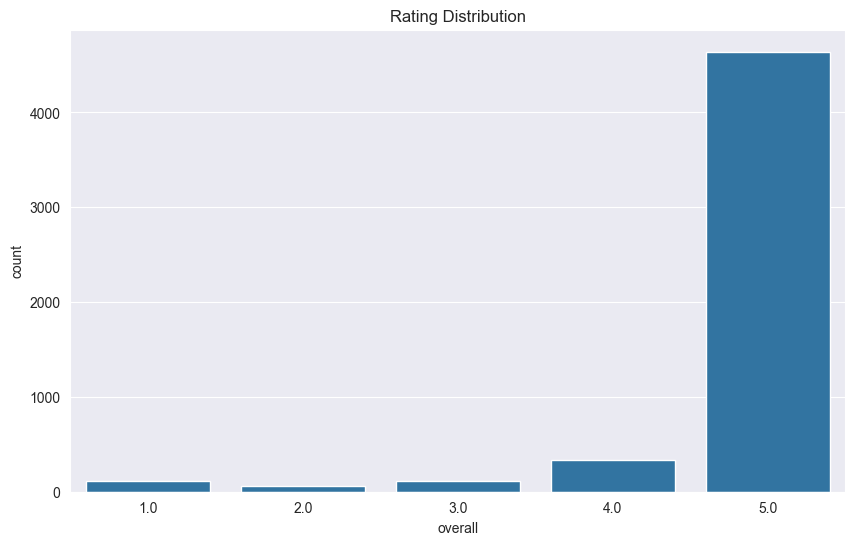

In [9]:
#Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='overall', data=df)
plt.title('Rating Distribution')
plt.show()

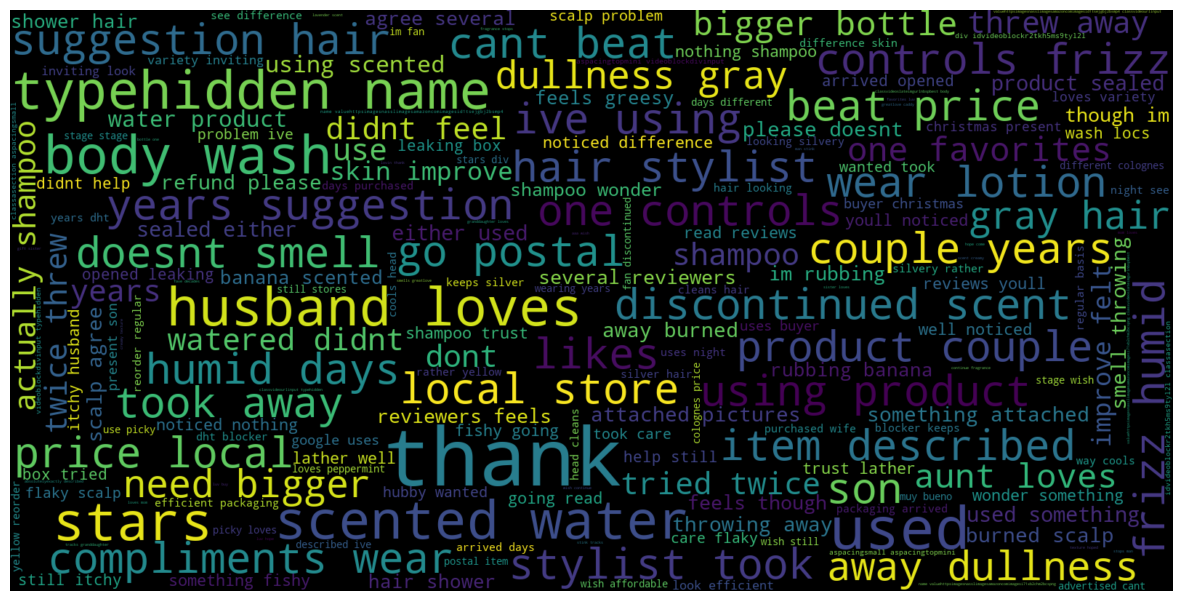

In [10]:
#Word Cloud
consolidated=' '.join(word for word in df['CleanedText'][df['SentimentScore']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

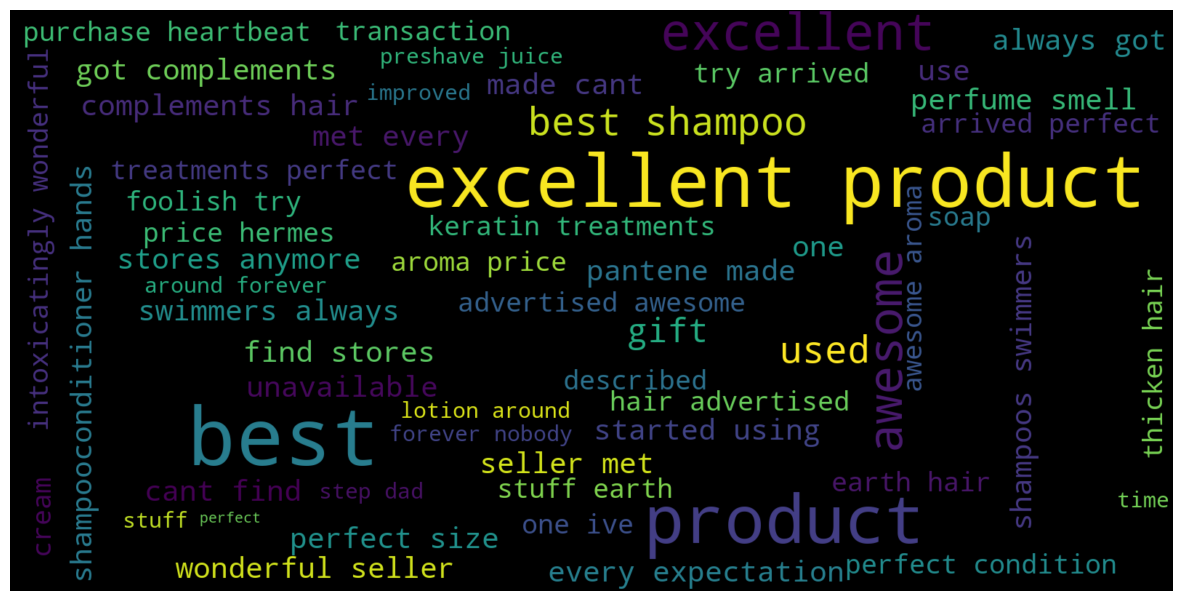

In [11]:
consolidated=' '.join(word for word in df['CleanedText'][df['SentimentScore']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
analyzer = SentimentIntensityAnalyzer()
df['compound'] = df['CleanedText'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

def label_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['compound'].apply(label_sentiment)

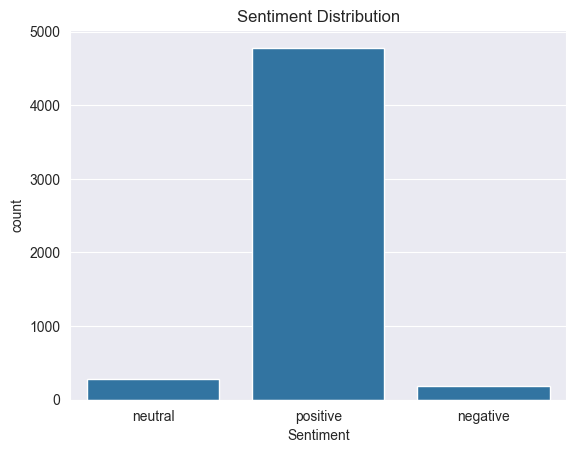

In [13]:
#Visualization
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

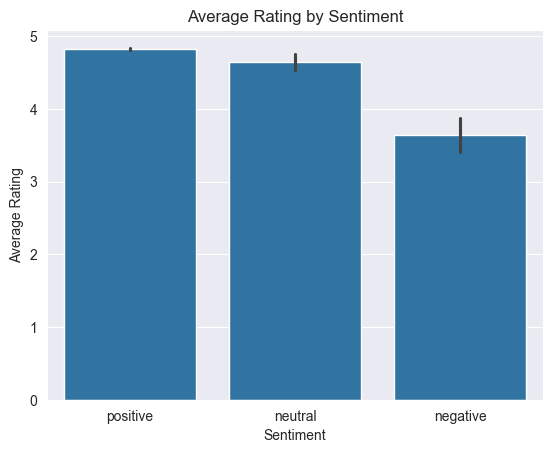

In [15]:
#Average rating by Sentiment
sns.barplot(x='Sentiment', y='overall', data=df, order=['positive', 'neutral', 'negative'])
plt.title('Average Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

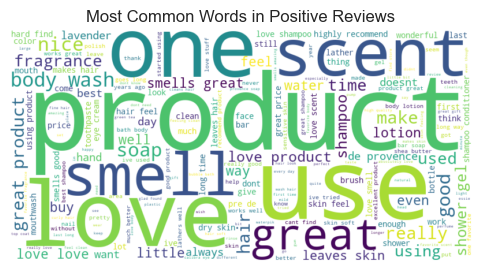

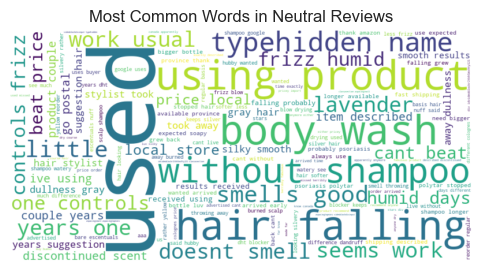

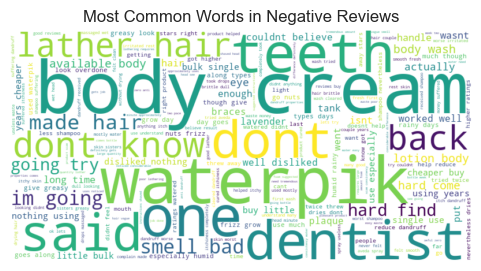

In [18]:
#Word Cloud for each sentiment
for Sentiment in ['positive', 'neutral', 'negative']:
    text = ' '.join(df[df['Sentiment'] == Sentiment]['CleanedText'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {Sentiment.capitalize()} Reviews')
    plt.show()